In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics

In [2]:
from sklearn.tree import DecisionTreeClassifier

In [3]:
traindata = pd.read_csv('data/train.csv')
testdata = pd.read_csv('data/test.csv')

In [4]:
traindata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
testdata.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Dataset features description

<b>PassengerId</b> Unique Id of a passenger. 

<b>Survived</b> Survival of a person 0 = No, 1 = Yes 

<b>Pclass</b> Passenger class Ticket class 1 = 1st(Upper), 2 = 2nd(Middle), 3 = 3rd(Lower)

<b>Sex</b> is a gender of the person 

<b>Age</b> in years 

<b>SibSp</b> # of siblings(brother, sister, stepbrother, stepsister) / spouses(husband, wife) aboard the Titanic

<b>Parch</b> # of parents(mother, father) / children(daughter, son, stepdaughter, stepson) aboard the Titanic: Some children travelled only with a nanny, therefore parch=0 for them. 

<b>Ticket</b> Ticket number 

<b>Fare</b> Passenger fare 

<b>Cabin</b> Cabin number 

<b>Embarked</b> Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

# 1. Data preprocessing

Data preprocessing composed of 

* Converting data into single datatype format
* Treating missing data
* Correction of the data such as identifying outliers
* Feature transformation i.e creating a new feature by using one or more features. 
    
By following these steps, will enhance the predictive capability of the model. Moreover, some of the algorithms may not work if they encounter missing values in the data or if the input data is not in one data format.

<br>
Based on the data, we can notice that 

1. <b>Title</b> feature is a mix of numeric and alphanumeric data types. 

2. <b>Cabin</b> feature is alphanumeric.

3. <b>Name</b> feature may contain errors or typos as there are several ways used to describe a name including titles, round brackets, and quotes used for alternative or short names.



## 1.1 Identifying categorical features and numerical features in the dataset:

Grouping of similar samples into sets considered as categorical features. <b>Nominal, ordinal, ratio, or interval</b> based types of features come categorical features.


Numerical feature values change from sample to sample. <b>Discrete, continuous, or timeseries</b> based considered as numerical features.

Based on a specific feature type helps us to select the appropriate plots for visualization.

#### Categorical: Survived, Sex, and Embarked. Ordinal: Pclass.

#### Continous: Age, Fare. Discrete: SibSp, Parch.

# 2. Exploratory data analysis

In statistics, exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task. 

Used statical methods for <I>Titanic dataset</I> are:
1. Mean: Average value of all data points
2. Median is the "middle" value of a sorted data points.
3. Mode: is the value that appears most often in data points
4. Standard deviation: value would tell you how much the data points deviate from the mean value of its data points.
5. Distribution plots: Helps us to understand the column values 
6. Regression: It helps to determine the relationship between one or more features to the dependent variable(target variable).

Let's apply one or more methods for summarizing each column's characteristics.

In [6]:
traindata.info()
print('*********************************')
print('''From the above description Age, Cabin and Embarked columns have null values, these values have to be preprocessed.\n
Seven features are integer/floats.\n
Five features are strings (object).''')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
*********************************
From the above description Age, Cabin and Embarked columns have null values, these values have to be preprocessed.

Seven features are integer/floats.

Five features are strings (object).


In [7]:
testdata.info()
print('*********************************')
print('''From the above description Age, Cabin and Fare columns have null values, these values have to be preprocessed.\n
Six are integer/floats.\n
Five features are strings (object).''')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
*********************************
From the above description Age, Cabin and Fare columns have null values, these values have to be preprocessed.

Six are integer/floats.

Five features are strings (object).


<br>
Nevertheless, as per dataset description I can assume that <b>PassengerId</b>, <b>Cabin</b> and <b>Ticket</b> columns would not influence the the survial of a person. Hence, it would be better skip those and will also help us for easy analysis.  

In [8]:
list_data = {'traindata':traindata, 'testdata':testdata}

for name, data in list(list_data.items()):
    print(f'{name.title()} shape before skipping : ', data.shape)
    data.drop(['PassengerId','Ticket','Cabin'],inplace=True, axis=1)
    print(f'{name.title()} shape after skipping data: ', data.shape)
    print('-'*50)

Traindata shape before skipping :  (891, 12)
Traindata shape after skipping data:  (891, 9)
--------------------------------------------------
Testdata shape before skipping :  (418, 11)
Testdata shape after skipping data:  (418, 8)
--------------------------------------------------


# 3. Statical analysis of each feature in the dataset

## 3.1 Survived feature

Since it is our target variable, it is important to know the distribution rate of the survived people in the data. If it has a  uniform distribution(i.e equal percentage) then we can build an unbiased predictive model. 

549
342


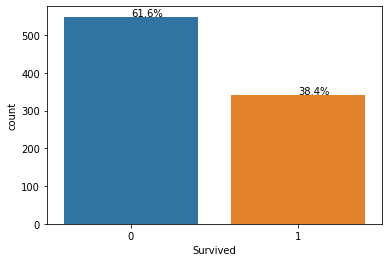

In [9]:
ax = sns.countplot(x="Survived", data=traindata)
total = len(traindata['Survived'])
for p in ax.patches:
    print(p.get_height())
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_y() + p.get_height() + 1.5
    ax.annotate(percentage, (x, y))
plt.show()

The visualization shows that more than 20% of people have died compared to survived people. I assume that our predictive model may <b>estimate more sample under non-survived category(i.e biased)</b> especially for unseen data. Hence, it is a crucial step for choosing a model with a good performance based on any one of the following methods

1. Collecting more samples to maintain class balance, of course, which is not possible right now.
2. Choosing a correct metric to evaluate model such as 
    * Precision(A measure of a classifiers exactness)
    * Recall(A measure of a classifiers completeness)
    * Confusion Matrix(A breakdown of predictions into a table showing correct predictions)
    * ROC Curves (Like precision and recall, accuracy is divided into sensitivity and specificity and models can be chosen based on the balance thresholds of these values.)
3. over-sampling(Adding copies of instances from the under-represented class) or under-sampling (Delete instances from the over-represented class)

## 3.2 Pclass feature

#### How many people have survived or died according to passenger class?

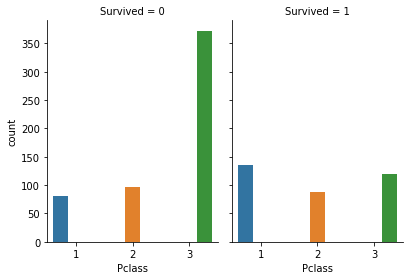

In [10]:
g = sns.catplot(x="Pclass", hue="Pclass", col="Survived",
                data=traindata, kind="count",
                height=4, aspect=.7);

In [11]:
traindata[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
# count_Pclass = pd.DataFrame(traindata.Pclass.value_counts()).to_dict()['Pclass']
# print(count_Pclass)
# survived_df["count_Pclass"] = survived_df["Pclass"].apply(lambda x: count_Pclass.get(x))
# survived_df['per']= survived_df['Survived']/survived_df['count_Pclass']
# survived_df

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


From the above percentage scores, the higher the passenger class(1 means high class and 3 means low class), the higher the survival rate. 

## 3.3 Name feature

Name column values are shown below. Generally, the names of people will not contribute any information to the survival rate. However, in the 19th century, people were given respect according to the title they have. Hence, by applying, the feature transformation will give their titles.

In [12]:
traindata.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [13]:
# Applying feature transformation on Name column

for name, data in list(list_data.items()):
    data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.')
    data['Title'] = data['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr','Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    data['Title'] = data['Title'].replace('Mlle', 'Miss')
    data['Title'] = data['Title'].replace('Ms', 'Miss')
    data['Title'] = data['Title'].replace('Mme', 'Mrs')
    data.drop(['Name'], axis=1, inplace=True)
traindata[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Rare,0.347826
2,Mr,0.156673


It seems that women were saved during a titanic disaster more than the high status of male persons. 

## 3.4 Sex feature

From the Name feature, the female proportion survival rate is very high. It is around 74% 

      Sex  Survived
0  female  0.742038
1    male  0.188908


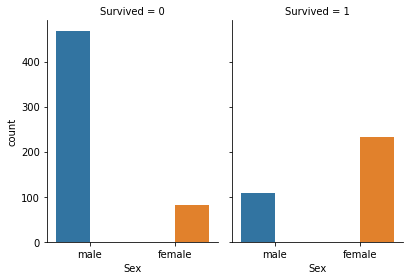

In [14]:
print(traindata[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False))
g = sns.catplot(x="Sex", hue="Sex", col="Survived",
                data=traindata, kind="count",
                height=4, aspect=.7);

## 3.5 Age feature
<br>
Often people replace missing values with a mean value of their continuous range values. However, it is not an ideal scenario. For estimation of missing value can be done with the help of other correlated features i.e Pclass and Gender. <b>Median value</b> will be considered for replacing a null value for each subset. The sample was grouped according to Pclass and Gender which is shown below.

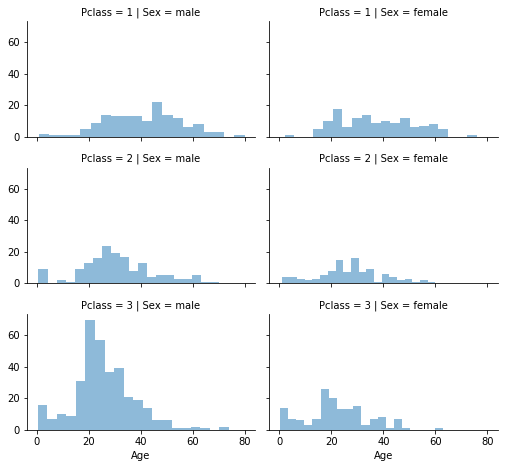

In [15]:
train_age = traindata[['Age', 'Pclass','Sex']]
test_age = testdata[['Age', 'Pclass','Sex']]
df_age = pd.concat([train_age,test_age],ignore_index=True)

grid = sns.FacetGrid(df_age, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age',alpha=.5, bins=20)
grid.add_legend()

From the above image, we can see that each subset has different age distributions i.e mean, median and mode of an age.

In [16]:
# checking null values and replacing them with a median value.

for name, data in list(list_data.items()):
    print(f'Age column null values in {name.title()}:',data['Age'].isnull().sum())
    for i in ['male', 'female']:
        for j in range(0, 3):
            subset_df = df_age[(df_age['Sex'] == i) & (df_age['Pclass'] == j+1)]['Age'].dropna()
            print(f'\nSubset from {name.title()} with Gender: {i},\tPclass: {j}:')
            print(subset_df.describe())
            print('Median value:', round(subset_df.median()))
            print('Mode value:', round(subset_df.mode()[0]))
            print('****************')
            data.loc[(data.Age.isnull()) & (data.Sex == i) & (data.Pclass == j+1),'Age'] = int(round(subset_df.median()))
    print(f'Age column null values after replacement in {name.title()}:',data['Age'].isnull().sum())
    data["Age"] = data["Age"].astype(int) 
    print('-'*20)

Age column null values in Traindata: 177

Subset from Traindata with Gender: male,	Pclass: 0:
count    151.000000
mean      41.029272
std       14.578529
min        0.920000
25%       30.000000
50%       42.000000
75%       50.000000
max       80.000000
Name: Age, dtype: float64
Median value: 42
Mode value: 36.0
****************

Subset from Traindata with Gender: male,	Pclass: 1:
count    158.00000
mean      30.81538
std       13.97740
min        0.67000
25%       23.00000
50%       29.50000
75%       38.75000
max       70.00000
Name: Age, dtype: float64
Median value: 30
Mode value: 30.0
****************

Subset from Traindata with Gender: male,	Pclass: 2:
count    349.000000
mean      25.962264
std       11.682415
min        0.330000
25%       20.000000
50%       25.000000
75%       32.000000
max       74.000000
Name: Age, dtype: float64
Median value: 25
Mode value: 21.0
****************

Subset from Traindata with Gender: female,	Pclass: 0:
count    133.000000
mean      37.037594
st

We have seen a method for replacing missing values as well as a visual relationship among <b>Age, Pclass and Gender</b>. At subset level of the data has followed almost <b>left-skewed distibution</b>. In another word, its mode value lies left to the mean value and most of the cases mean, median values are almost close to each other. 

In [17]:
import scipy.stats as st
def get_best_distribution(data):
    dist_names = ["norm", "exponweib", "weibull_max", "weibull_min", "pareto", "genextreme"]
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)
        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
#         print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))
#     print(dist_results)
#     print(params)
    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("Best fitting distribution: "+str(best_dist))
#     print("Best p value: "+ str(best_p))
#     print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_dist, best_p, params[best_dist]

Best fitting distribution: genextreme
('genextreme', 1.4292621709318743e-07, (0.10210141422952809, 24.442709475020692, 11.175663347485344))
Best fitting distribution: norm
('norm', 0.036310183888932604, (28.055882352941175, 13.954120015175585))


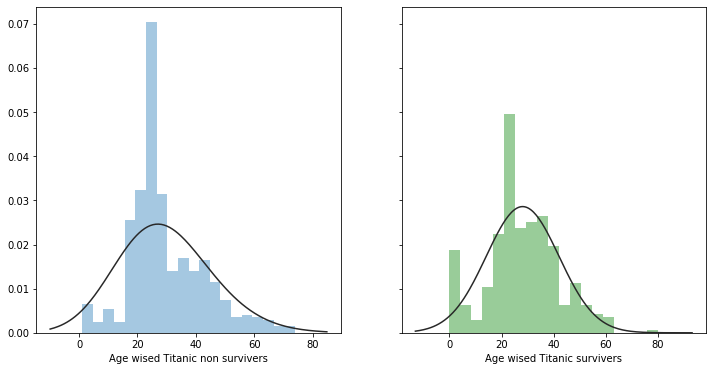

In [18]:
print(get_best_distribution(traindata.dropna()[traindata['Survived']==0]['Age']))
print(get_best_distribution(traindata.dropna()[traindata['Survived']==1]['Age']))

from scipy.stats import genextreme,norm, exponweib
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(12,6))
sns.distplot(traindata.dropna()[traindata['Survived']==0]['Age'], fit=exponweib, kde=False,ax=ax1,axlabel='Age wised Titanic non survivers')
sns.distplot(traindata.dropna()[traindata['Survived']==1]['Age'], fit=norm, kde=False,color='g', ax=ax2,axlabel='Age wised Titanic survivers')


### Using density plots one can answer, which age group of people has survived at a high rate and also who had died at a high rate during the disaster.

* These probability values are also helpful for replacing missing data in the data with respect to survivers vs non-survivors.
* From the above density plot, we can observe that most of the people who were survived during a titanic disaster are in the range between 20 to 35 years old.

### Is it possible to determine the relationship between Age vs Fare features?

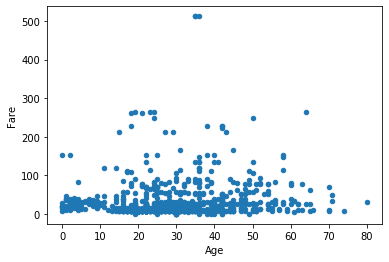

In [19]:
traindata.dropna().plot.scatter(x='Age', y='Fare')

Since most of the ticket fares are uniformly distributed for each age. It is hard to determine the relationship.

## 3.6 SibSp & Parch features

In [20]:
traindata[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [21]:
traindata[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


However, SibSp and Parch features have describes a higher rate of survival for people who are with parents on the ship. More family members contribute to the decrease in survival rate.

Let's create a feature namely whether a person is alone or not by using Parch and SibSp features.  

In [22]:
for name, data in list(list_data.items()):
    data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
    data['IsAlone'] = 0
    data.loc[data['FamilySize'] == 1, 'IsAlone'] = 1
#     data.drop(['Parch', 'SibSp', 'FamilySize'],inplace=True, axis=1) # drop unnecessary columns
traindata[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


## 3.8 Fare feature

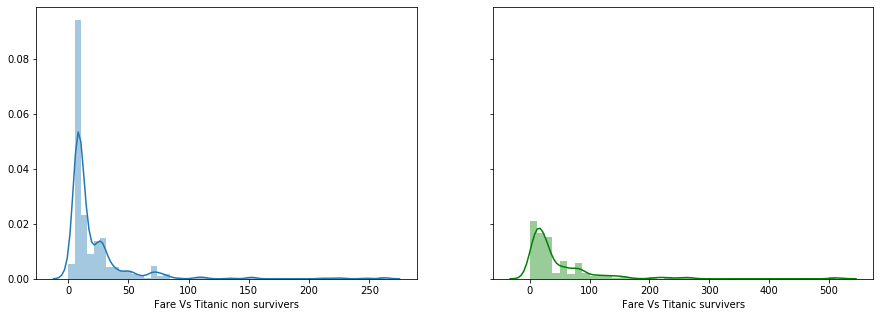

In [23]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(15,5))
sns.distplot(traindata.dropna()[traindata['Survived']==0]['Fare'],ax=ax1,axlabel='Fare Vs Titanic non survivers')
sns.distplot(traindata.dropna()[traindata['Survived']==1]['Fare'],color='g', ax=ax2,axlabel='Fare Vs Titanic survivers')

In [24]:
for name, data in list(list_data.items()):
#     data['Fare'].fillna(data['Fare'].dropna().median(), inplace=True)
    data['bin_Fare'] = pd.qcut(data.Fare, 4)
testdata['Fare'].fillna(testdata['Fare'].dropna().median(), inplace=True)
traindata[['bin_Fare', 'Survived']].groupby(['bin_Fare'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,bin_Fare,Survived
3,"(31.0, 512.329]",0.581081
2,"(14.454, 31.0]",0.454955
1,"(7.91, 14.454]",0.303571
0,"(-0.001, 7.91]",0.197309


In [25]:
for name, data in list(list_data.items()):
    data['Fare'] = pd.qcut(data.Fare, 4, labels=[0,1,2,3]).astype(int)
    data.drop(['bin_Fare'],inplace=True, axis=1)

People who bought tickets within range of (31.0, 512.329]$,  likey to be survived because those tickets belong higher than 3rd class passenger tickets.

## 3.9 Embarked feature

Embarked feature takes S, Q, C values based on port of embarkation.

C = Cherbourg, 

Q = Queenstown,

S = Southampton

In [26]:
# In train data 2 missing values exist, hence these can be replaced by the mode values of the Embarked column.
freq_Embarked = traindata.Embarked.dropna().mode()[0]
traindata['Embarked'] = traindata['Embarked'].fillna(freq_Embarked)
traindata[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


### Still, there are categorical features in the dataset. These columns will be converted into ordinal values.

In [27]:
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for name, data in list(list_data.items()):
    data['Sex'] = data['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
    data['Age'] = pd.cut(data.Age, bins=5, labels=[0,1,2,3,4]).astype(int)
    data['Title'] = data['Title'].map(titles).astype(int)
    data['Embarked'] = data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    data['Age_Class']= data['Age']* data['Pclass']
    print(data.info())
    print('-'*60)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int32
Age           891 non-null int32
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null int32
Embarked      891 non-null int32
Title         891 non-null int32
FamilySize    891 non-null int64
IsAlone       891 non-null int64
Age_Class     891 non-null int64
dtypes: int32(5), int64(7)
memory usage: 66.3 KB
None
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
Pclass        418 non-null int64
Sex           418 non-null int32
Age           418 non-null int32
SibSp         418 non-null int64
Parch         418 non-null int64
Fare          418 non-null int32
Embarked      418 non-null int32
Title         418 non-null int32
FamilySize    4

In [28]:
# traindata['Embarked'] = pd.Categorical(traindata['Embarked'])
# dfDummies = pd.get_dummies(traindata['Embarked'], prefix = 'category')
# traindata.drop(['Embarked'],inplace=True, axis=1)
# traindata = pd.concat([traindata, dfDummies],axis=1)

In [29]:
traindata.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,Age_Class
0,0,3,0,1,1,0,0,0,1,2,0,3
1,1,1,1,2,1,0,3,1,3,2,0,2
2,1,3,1,1,0,0,1,0,2,1,1,3
3,1,1,1,2,1,0,3,0,3,2,0,2
4,0,3,0,2,0,0,1,0,1,1,1,6


### Applying oversampling method on the data to avoid class imbalance.

In [30]:
X_train = traindata.drop("Survived", axis=1)
Y_train = traindata["Survived"]
X_test  = testdata.copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 11), (891,), (418, 11))

In [31]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
oversample = SMOTE()
X_resampled, y_resampled = oversample.fit_resample(X_train, Y_train)
X1,X2,y1,y2 = train_test_split(X_resampled,y_resampled, test_size=0.2)
pd.DataFrame(y_resampled)[0].value_counts()
X1.shape, X2.shape, y1.shape, y2.shape

((878, 11), (220, 11), (878,), (220,))

# 4. Predicitve modeling

Sofar, we have seen statical analysis of the data. It has been preprocessed and analysed. Now, it is time to train a model. For classification purpose there are several machine learning algotihms are avaialble. Out of them I would to choose <b>Decision Tree </b> 

AUC (Area Under Curve) is used as a evaluation metric, since the target value is binary. Hence it’s a binary classification problem. AUC is a good way for evaluation for this type of problems.


#### Regularization:

It discourages learning a more complex or flexible model, so as to avoid the risk of overfitting. One of the ways of avoiding overfitting is to use cross validation, that helps in estimating the error over test set, and in deciding what parameters work best for your model.

## 4.1 Decision Tree

Decision Tree solves the problem of machine learning by transforming the data into a tree representation. Each internal node of the tree representation denotes an attribute and each leaf node denotes a class label. Decision tree algorithm can be used to solve both regression and classification problems.

#### Advantages:

* Compared to other algorithms decision trees requires less effort for data preparation during pre-processing.
* A decision tree does not require normalization of data.
* A decision tree does not require scaling of data as well.
* Missing values in the data also does NOT affect the process of building a decision tree to any considerable extent.
* A Decision trees model is very intuitive and easy to explain to technical teams as well as stakeholders.

#### Disadvantage:

* A small change in the data can cause a large change in the structure of the decision tree causing instability.
* Decision Tree algorithm is inadequate for applying regression and predicting continuous values.

#### Pruning

Growing the tree beyond a certain level of complexity leads to overfitting. In our data, age doesn’t have any impact on the target variable. Growing the tree beyond Gender is not going to add any value. Need to cut it at Gender. This process of trimming trees is called Pruning.

Avoid overfitting by changing the parameters:

* <b>max_depth:</b> How deep the tree can be. The deeper the tree, the more splits it has and it captures more information about the data. However, an increase in depth may good for training but it will fail to generalize the unseen data.

* <b>min_samples_leaf:</b> the Minimum number of samples required to split at leaf node, increase in percentage may the model cannot learn enough about the data. 

* <b>max_features:</b> max_features represents the number of features to consider when looking for the best split. An increase in number features for the best split may cause overfitting. 

* <b>max_leaf_nodes:</b> Reduce the number of leaf nodes



In [32]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_resampled, y_resampled)
# Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X1, y1) * 100, 2)
print('Model accuracy: ',acc_decision_tree)

Model accuracy:  88.72


In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
y_pred = decision_tree.predict(X1)
confusion_matrix(y_pred=y_pred, y_true=y1)

array([[407,  30],
       [ 69, 372]], dtype=int64)

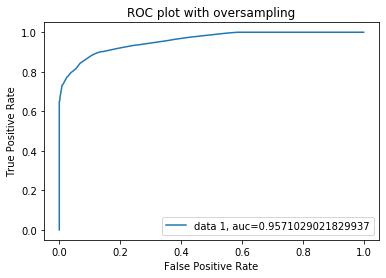

In [34]:
y_probas = decision_tree.predict_proba(X1)[::,1]
# print(y_probas)
fpr, tpr, _ = metrics.roc_curve(y1,  y_probas)
auc = metrics.roc_auc_score(y1, y_probas)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.title('ROC plot with oversampling')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Model accuracy:  88.89


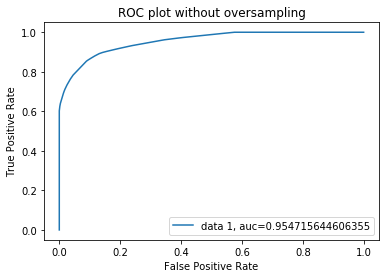

In [35]:
decision_tree_norm = DecisionTreeClassifier()
decision_tree_norm.fit(X_train, Y_train)
# Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree_norm.score(X_train, Y_train) * 100, 2)
print('Model accuracy: ',acc_decision_tree)


y_probas = decision_tree_norm.predict_proba(X_train)[::,1]
# print(y_probas)
fpr, tpr, _ = metrics.roc_curve(Y_train,  y_probas)
auc = metrics.roc_auc_score(Y_train, y_probas)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.title('ROC plot without oversampling')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

#### From the above ROC curve, model is able predict each category with a certainity of 95%. Overall accuracy of the model is 88%

## Check whether it is a bias or variance problem

If a model has high bias, it will fail to capture the complexity of the data. This would be like using a linear model for data that has a quadratic form. In short, high bias means the model underfits the data. In contrast, high variance means a model is too complex like using a 100 degree polynomial for that quadratic data. In this situation, overfitting of the data. 

In [36]:
from mlxtend.evaluate import bias_variance_decomp
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(decision_tree, X1, y1,X2,y2, random_seed=123)
print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

Average expected loss: 0.179
Average bias: 0.173
Average variance: 0.067


From the above result, I can conclude the trained model an under fitted due to high bias value whereas its variance values it low. Nevertheless, the is good enough to capture a relatively complex relationship as well as good enough to generalize unseen data. Below shown cross-validation results. The model has performed very well on test data with very less standard deviation

In [37]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(decision_tree_norm, X_train, Y_train, cv=5, scoring='accuracy')
cv_results['test_score']

array([0.78212291, 0.78651685, 0.79775281, 0.78089888, 0.84269663])

### The following code is will be used for parameter tuning, however, the model works very well for default values.

In [38]:
import itertools
import datetime
max_depths  = np.linspace(1, 5, 5, endpoint=True)
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
max_features = [i for i in range(2, X_train.shape[1])][:5]
max_leaf_nodes = np.linspace(2, 5, 4, endpoint=True)

parameters = list(itertools.product(max_depths,min_samples_leafs,max_features, max_leaf_nodes))

In [39]:
def plot(data, title_, x_name):
    plt.plot(data)
    plt.title(title_)
    plt.xlabel(x_name)
    plt.show()
    plt.savefig(f'{title_}.png')

In [40]:
def train(model, train_data, train_target, file_name = None, params= None):
    models_to_build = len(params)
    print(f'***********Total models to build are: {models_to_build}**************')
    scores = []
    best_score = 0
    for idx, parameter in enumerate(params):
        max_depth, features, min_samples, max_leaf_node = parameter
        model.max_depth= max_depth
        model.max_features=features
        model.min_samples_leaf=min_samples
        model.max_leaf_nodes=int(max_leaf_node)
        start_time = datetime.datetime.now()
        model.fit(train_data, train_target)
        end_time = datetime.datetime.now()
#         predictions = model.predict(train_data)
        acc = round(decision_tree.score(X_train, Y_train) * 100, 2)        
        scores.append(acc)
        text = f'Model:[{idx+1}/{models_to_build}]\tAcc Score: {acc}\t Computing time: {end_time-start_time}'
        print(text)
#         file_name = f'result/{file_name}.txt'
#         with open(file_name, 'w') as f:
#             f.write(text)
#             f.write('\n')
#         file_name = file_name.split('.')[0] + '.sav'
#         if best_score == 0:
#             best_score = mse_score
#             print('Best score achieved at: ',text)
#             pickle.dump(reg_model, open(file_name, 'wb'))
#         elif acc > best_score:
#             best_score = acc
#             print('Best score updated to: ',text)
#             pickle.dump(model, open(file_name, 'wb'))
#             print('Model saved at ', parameter)
#     plot(data=scores, title_= 'Train model performance', x_name='Acc Score')
    return model


train(model=decision_tree,train_data=X_train, train_target=Y_train, params=parameters)

***********Total models to build are: 500**************
Model:[1/500]	Acc Score: 62.07	 Computing time: 0:00:00.001993
Model:[2/500]	Acc Score: 61.73	 Computing time: 0:00:00.000994
Model:[3/500]	Acc Score: 63.41	 Computing time: 0:00:00.000996
Model:[4/500]	Acc Score: 62.07	 Computing time: 0:00:00.001000
Model:[5/500]	Acc Score: 62.18	 Computing time: 0:00:00.002974
Model:[6/500]	Acc Score: 66.67	 Computing time: 0:00:00.002024
Model:[7/500]	Acc Score: 78.68	 Computing time: 0:00:00.001999
Model:[8/500]	Acc Score: 66.67	 Computing time: 0:00:00.001030
Model:[9/500]	Acc Score: 62.07	 Computing time: 0:00:00.000997
Model:[10/500]	Acc Score: 62.74	 Computing time: 0:00:00.000997
Model:[11/500]	Acc Score: 78.23	 Computing time: 0:00:00.001002
Model:[12/500]	Acc Score: 63.41	 Computing time: 0:00:00.000994
Model:[13/500]	Acc Score: 61.62	 Computing time: 0:00:00.001998
Model:[14/500]	Acc Score: 61.73	 Computing time: 0:00:00
Model:[15/500]	Acc Score: 63.41	 Computing time: 0:00:00.000993


Model:[154/500]	Acc Score: 78.9	 Computing time: 0:00:00.000978
Model:[155/500]	Acc Score: 78.68	 Computing time: 0:00:00.000998
Model:[156/500]	Acc Score: 69.58	 Computing time: 0:00:00.000973
Model:[157/500]	Acc Score: 66.78	 Computing time: 0:00:00.000978
Model:[158/500]	Acc Score: 69.25	 Computing time: 0:00:00.000998
Model:[159/500]	Acc Score: 78.23	 Computing time: 0:00:00.000974
Model:[160/500]	Acc Score: 69.58	 Computing time: 0:00:00.000974
Model:[161/500]	Acc Score: 78.68	 Computing time: 0:00:00.000973
Model:[162/500]	Acc Score: 74.52	 Computing time: 0:00:00.001000
Model:[163/500]	Acc Score: 78.56	 Computing time: 0:00:00.000994
Model:[164/500]	Acc Score: 78.68	 Computing time: 0:00:00.000969
Model:[165/500]	Acc Score: 66.78	 Computing time: 0:00:00.000972
Model:[166/500]	Acc Score: 78.68	 Computing time: 0:00:00.000998
Model:[167/500]	Acc Score: 78.68	 Computing time: 0:00:00.000996
Model:[168/500]	Acc Score: 70.37	 Computing time: 0:00:00.001995
Model:[169/500]	Acc Score:

Model:[281/500]	Acc Score: 66.78	 Computing time: 0:00:00.000973
Model:[282/500]	Acc Score: 78.9	 Computing time: 0:00:00.000997
Model:[283/500]	Acc Score: 78.68	 Computing time: 0:00:00.000997
Model:[284/500]	Acc Score: 83.16	 Computing time: 0:00:00.000997
Model:[285/500]	Acc Score: 78.68	 Computing time: 0:00:00.000994
Model:[286/500]	Acc Score: 74.97	 Computing time: 0:00:00.000973
Model:[287/500]	Acc Score: 78.68	 Computing time: 0:00:00.000997
Model:[288/500]	Acc Score: 78.56	 Computing time: 0:00:00.000997
Model:[289/500]	Acc Score: 78.68	 Computing time: 0:00:00.001000
Model:[290/500]	Acc Score: 80.36	 Computing time: 0:00:00.000973
Model:[291/500]	Acc Score: 78.68	 Computing time: 0:00:00.000971
Model:[292/500]	Acc Score: 80.02	 Computing time: 0:00:00.000975
Model:[293/500]	Acc Score: 66.78	 Computing time: 0:00:00.001995
Model:[294/500]	Acc Score: 78.68	 Computing time: 0:00:00.000996
Model:[295/500]	Acc Score: 78.68	 Computing time: 0:00:00.000996
Model:[296/500]	Acc Score:

Model:[433/500]	Acc Score: 62.74	 Computing time: 0:00:00.000971
Model:[434/500]	Acc Score: 69.25	 Computing time: 0:00:00.000974
Model:[435/500]	Acc Score: 76.43	 Computing time: 0:00:00.001019
Model:[436/500]	Acc Score: 71.72	 Computing time: 0:00:00.000973
Model:[437/500]	Acc Score: 78.23	 Computing time: 0:00:00.000973
Model:[438/500]	Acc Score: 78.9	 Computing time: 0:00:00.001004
Model:[439/500]	Acc Score: 76.99	 Computing time: 0:00:00.001020
Model:[440/500]	Acc Score: 76.32	 Computing time: 0:00:00.000980
Model:[441/500]	Acc Score: 66.67	 Computing time: 0:00:00.000963
Model:[442/500]	Acc Score: 70.59	 Computing time: 0:00:00.000973
Model:[443/500]	Acc Score: 78.68	 Computing time: 0:00:00.000998
Model:[444/500]	Acc Score: 69.81	 Computing time: 0:00:00.000997
Model:[445/500]	Acc Score: 78.23	 Computing time: 0:00:00.001020
Model:[446/500]	Acc Score: 78.9	 Computing time: 0:00:00.000998
Model:[447/500]	Acc Score: 80.02	 Computing time: 0:00:00.000996
Model:[448/500]	Acc Score: 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5.0, max_features=0.5, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')